# Movie Data Project 

In this project, I will extract data from ***TMDB***'s movies API, perform transformations, and conduct data analaysis to derive insights.

## STEP 1: API Data Extraction

In [5]:
# Import packages all necessary packages
from dotenv import load_dotenv
import os
import requests
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt

In [4]:
# load .env file in this directory
load_dotenv()

# assign api key
api_key = os.getenv('TMDB_API_KEY')

In [5]:
# Extract data from tmdb api

# movies ids to be specifically extracted
movie_ids = [0, 299534, 19995, 140607, 299536, 597, 135397, 420818, 24428, 168259, 99861, 284054, 12445, 181808, 330457, 351286, 109445, 321612, 260513]
   

#set empty list for movies
movies = []

for movie_id in movie_ids:
    response = requests.get(f"https://api.themoviedb.org/3/movie/{movie_id}?api_key={api_key}&append_to_response=credits")
    if response.status_code == 200:
        data = response.json()
        movies.append(data)
    else:
        print(f"Movie with ID {movie_id} not found.")


Movie with ID 0 not found.


In [6]:
# checking length of items in the movies list after extraction. Only music_id 0 was not found
print(f'Movie IDs: {len(movie_ids)} || Exctracted Items: {len(movies)}')

Movie IDs: 19 || Exctracted Items: 18


Typical JSON file structure. Nested Dictionaries and Lists.

In [8]:
# checking the keys of the dictionaries
movies[0].keys()

dict_keys(['adult', 'backdrop_path', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id', 'imdb_id', 'origin_country', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'video', 'vote_average', 'vote_count', 'credits'])

In [9]:
#convert lists to DataFrame
df_movies = pd.DataFrame(movies)

In [10]:
# explore dataframe
df_movies.head(2)

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,origin_country,original_language,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,credits
0,False,/7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",356000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",https://www.marvel.com/movies/avengers-endgame,299534,tt4154796,[US],en,...,2799439100,181,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Avenge the fallen.,Avengers: Endgame,False,8.238,26211,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
1,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",https://www.avatar.com/movies/avatar,19995,tt0499549,[US],en,...,2923706026,162,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Enter the world of Pandora.,Avatar,False,7.588,32119,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."


In [11]:
# Export file as csv to /data/raw directory
df_movies.to_csv('../data/raw/raw_csv_data.csv', index=False)

## STEP 2: Data Cleaning and Preprocessing

In this sprint, I do the *data cleaning and preparation*. From exploring the dataset, dropping irrelevant columns, filtering and more.

### a. Data Preparation and Cleaning

In [12]:
# read raw data
df_movies = pd.read_csv('../data/raw/raw_csv_data.csv')
df_movies.head(1)

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,origin_country,original_language,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,credits
0,False,/7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",356000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",https://www.marvel.com/movies/avengers-endgame,299534,tt4154796,['US'],en,...,2799439100,181,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Avenge the fallen.,Avengers: Endgame,False,8.238,26211,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."


### b. Drop Unused Columns

In [13]:
# drop irrelevant columns
df_movies = df_movies.drop(columns=['adult', 'imdb_id', 'original_title',
                                    'video', 'homepage','backdrop_path'])

In [14]:
df_movies = df_movies.drop(columns=['origin_country'])

### c. Evaluate JSON columns

In [17]:
# check columns with unusual structure
df_movies[['belongs_to_collection', 'genres', 'production_countries', 'production_companies', 
           'spoken_languages', 'credits']].head()

,belongs_to_collection,genres,production_countries,production_companies,spoken_languages,credits
0,"{'id': 86311, 'name': 'The Avengers Collection...","[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...","[{'english_name': 'English', 'iso_639_1': 'en'...","{'cast': [{'adult': False, 'gender': 2, 'id': ..."
1,"{'id': 87096, 'name': 'Avatar Collection', 'po...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 444, 'logo_path': None, 'name': 'Dune ...","[{'english_name': 'English', 'iso_639_1': 'en'...","{'cast': [{'adult': False, 'gender': 2, 'id': ..."
2,"{'id': 10, 'name': 'Star Wars Collection', 'po...","[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 1, 'logo_path': '/tlVSws0RvvtPBwViUyOF...","[{'english_name': 'English', 'iso_639_1': 'en'...","{'cast': [{'adult': False, 'gender': 2, 'id': ..."
3,"{'id': 86311, 'name': 'The Avengers Collection...","[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...","[{'english_name': 'English', 'iso_639_1': 'en'...","{'cast': [{'adult': False, 'gender': 2, 'id': ..."
4,NaN,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 4, 'logo_path': '/gz66EfNoYPqHTYI4q9UE...","[{'english_name': 'English', 'iso_639_1': 'en'...","{'cast': [{'adult': False, 'gender': 2, 'id': ..."


In [18]:
# explore columns
df_movies[['belongs_to_collection', 'genres', 'production_countries', 'production_companies', 
           'spoken_languages', 'credits']].head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   belongs_to_collection  4 non-null      object
 1   genres                 5 non-null      object
 2   production_countries   5 non-null      object
 3   production_companies   5 non-null      object
 4   spoken_languages       5 non-null      object
 5   credits                5 non-null      object
dtypes: object(6)
memory usage: 372.0+ bytes


In [30]:
# check the type of the first value in the column - it looks like a dictionary. 
print(df_movies[['belongs_to_collection','genres','production_companies',
                 'production_countries','spoken_languages' ]].iloc[0])

for i in df_movies[['belongs_to_collection','genres','production_companies',
                      'production_countries','spoken_languages' ]].iloc[0]:
    print(type(i))


belongs_to_collection    {'id': 86311, 'name': 'The Avengers Collection...
genres                   [{'id': 12, 'name': 'Adventure'}, {'id': 878, ...
production_companies     [{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...
production_countries     [{'iso_3166_1': 'US', 'name': 'United States o...
spoken_languages         [{'english_name': 'English', 'iso_639_1': 'en'...
Name: 0, dtype: object
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


They look like strings but they are all of string datatypes. Cleaning will be hard! lmao

### d. Extract Key Data Points

In [33]:
# Extract collection name - convert 
def extract_collection(row):
    try:
        if pd.notna(row['belongs_to_collection']):
            # Convert string to dictionary using literal_eval from ast package
            collection_dict = ast.literal_eval(row['belongs_to_collection'])
            return collection_dict.get('name')
    except:
        pass
    return "Standalone"

#apply 
df_movies['collection_name'] = df_movies.apply(extract_collection, axis=1)

print('\nNew column(collection_name) created')
df_movies[['title', 'collection_name']].head()


New column(collection_name) created


,title,collection_name
0,Avengers: Endgame,The Avengers Collection
1,Avatar,Avatar Collection
2,Star Wars: The Force Awakens,Star Wars Collection
3,Avengers: Infinity War,The Avengers Collection
4,Titanic,Standalone


In [34]:
# Extract and join seperate genres with "|"
def extract_genres(row):
    try:
        if pd.notna(row['genres']):
            # Convert string to list of dictionaries
            genres_list = ast.literal_eval(row['genres'])
            # Extract genre names and join with "|"
            return "|".join([genre['name'] for genre in genres_list])
    except:
        pass
    return ""

df_movies['genres'] = df_movies.apply(extract_genres, axis=1)

print('\nUpdated "genres" column')
df_movies[['title', 'genres']].head()


Updated "genres" column


,title,genres
0,Avengers: Endgame,Adventure|Science Fiction|Action
1,Avatar,Action|Adventure|Fantasy|Science Fiction
2,Star Wars: The Force Awakens,Adventure|Action|Science Fiction
3,Avengers: Infinity War,Adventure|Action|Science Fiction
4,Titanic,Drama|Romance


In [35]:
# Extract and join production countries with "|"
def extract_production_countries(row):
    try:
        if pd.notna(row['production_countries']):
            # Convert string to list of dictionaries
            countries_list = ast.literal_eval(row['production_countries'])
            # Extract country names and join with "|"
            return "|".join([country['name'] for country in countries_list])
    except:
        pass
    return ""

df_movies['production_countries'] = df_movies.apply(extract_production_countries, axis=1)

print('\nUpdated "production_countries" column')
df_movies[['title', 'production_countries']].head()


Updated "production_countries" column


,title,production_countries
0,Avengers: Endgame,United States of America
1,Avatar,United States of America|United Kingdom
2,Star Wars: The Force Awakens,United States of America
3,Avengers: Infinity War,United States of America
4,Titanic,United States of America


In [36]:
# Extract and join production companies with "|"
def extract_production_companies(row):
    try:
        if pd.notna(row['production_companies']):
            # Convert string to list of dictionaries
            companies_list = ast.literal_eval(row['production_companies'])
            # Extract company names and join with "|"
            return "|".join([company['name'] for company in companies_list])
    except:
        pass
    return ""

df_movies['production_companies'] = df_movies.apply(extract_production_companies, axis=1)

print('\nUpdated "production_companies" created')
df_movies[['title', 'production_companies']].head()


Updated "production_companies" created


,title,production_companies
0,Avengers: Endgame,Marvel Studios
1,Avatar,Dune Entertainment|Lightstorm Entertainment|20...
2,Star Wars: The Force Awakens,Lucasfilm Ltd.|Bad Robot
3,Avengers: Infinity War,Marvel Studios
4,Titanic,Paramount Pictures|20th Century Fox|Lightstorm...


In [37]:
# Extract and join spoken languages with "|"
def extract_spoken_languages(row):
    try:
        if pd.notna(row['spoken_languages']):
            # Convert string to list of dictionaries
            languages_list = ast.literal_eval(row['spoken_languages'])
            # Extract language names and join with "|"
            return "|".join([lang['english_name'] for lang in languages_list])
    except:
        pass
    return ""

df_movies['spoken_languages'] = df_movies.apply(extract_spoken_languages, axis=1)

print('\nUpdated "spoken_languages" created')
df_movies[['title', 'spoken_languages']].head()


Updated "spoken_languages" created


,title,spoken_languages
0,Avengers: Endgame,English|Japanese|Xhosa
1,Avatar,English|Spanish
2,Star Wars: The Force Awakens,English
3,Avengers: Infinity War,English|Xhosa
4,Titanic,English|French|German|Swedish|Italian|Russian


In [38]:
df_movies[['belongs_to_collection', 'genres', 'production_countries', 'production_companies', 
           'spoken_languages', 'credits']].head()

,belongs_to_collection,genres,production_countries,production_companies,spoken_languages,credits
0,"{'id': 86311, 'name': 'The Avengers Collection...",Adventure|Science Fiction|Action,United States of America,Marvel Studios,English|Japanese|Xhosa,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
1,"{'id': 87096, 'name': 'Avatar Collection', 'po...",Action|Adventure|Fantasy|Science Fiction,United States of America|United Kingdom,Dune Entertainment|Lightstorm Entertainment|20...,English|Spanish,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
2,"{'id': 10, 'name': 'Star Wars Collection', 'po...",Adventure|Action|Science Fiction,United States of America,Lucasfilm Ltd.|Bad Robot,English,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
3,"{'id': 86311, 'name': 'The Avengers Collection...",Adventure|Action|Science Fiction,United States of America,Marvel Studios,English|Xhosa,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
4,NaN,Drama|Romance,United States of America,Paramount Pictures|20th Century Fox|Lightstorm...,English|French|German|Swedish|Italian|Russian,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."


In [39]:
# drop belongs to column
df_movies = df_movies.drop(columns='belongs_to_collection')

***Extract New Columns From Credits***

In [40]:
# Extract credits information
def extract_credits(row):
    try:
        if pd.notna(row['credits']):
            # Convert string to dictionary
            credits_dict = ast.literal_eval(row['credits'])
            
            # Get cast members (top 10 by order)
            cast = sorted(credits_dict.get('cast', []), key=lambda x: x.get('order', float('inf')))[:10]
            main_cast = "|".join([actor['name'] for actor in cast])
            
            # Get cast size
            cast_size = len(credits_dict.get('cast', []))
            
            # Get crew size
            crew_size = len(credits_dict.get('crew', []))
            
            # Get directors
            crew = credits_dict.get('crew', [])
            directors = "|".join([member['name'] for member in crew if member.get('job') == 'Director'])
            
            return pd.Series({
                'cast_size': cast_size,
                'crew_size': crew_size,
                'directors': directors,
                'cast': main_cast
            })
    except:
        pass
    return pd.Series({
        'cast_size': 0,
        'crew_size': 0,
        'directors': "",
        'cast': ""
    })

# Apply the function and create new columns
credits_info = df_movies.apply(extract_credits, axis=1)
df_movies = pd.concat([df_movies, credits_info], axis=1)

print('\nNew columns created')
df_movies[['title', 'cast_size', 'crew_size', 'directors', 'cast']].head()


New columns created


,title,cast_size,crew_size,directors,cast
0,Avengers: Endgame,105,593,Anthony Russo|Joe Russo,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...
1,Avatar,65,986,James Cameron,Sam Worthington|Zoe Saldaña|Sigourney Weaver|S...
2,Star Wars: The Force Awakens,182,257,J.J. Abrams,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...
3,Avengers: Infinity War,69,724,Anthony Russo|Joe Russo,Robert Downey Jr.|Chris Evans|Chris Hemsworth|...
4,Titanic,116,258,James Cameron,Leonardo DiCaprio|Kate Winslet|Billy Zane|Kath...


In [41]:
#drop credits
df_movies = df_movies.drop(columns='credits')

In [45]:
# check total columns after extraction and creating new columns
col_names = list(df_movies.head(0))

print(f'\n Number of Columns {len(col_names)}')
print(col_names)


 Number of Columns 23
['budget', 'genres', 'id', 'original_language', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'vote_average', 'vote_count', 'collection_name', 'cast_size', 'crew_size', 'directors', 'cast']


In [46]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                18 non-null     int64  
 1   genres                18 non-null     object 
 2   id                    18 non-null     int64  
 3   original_language     18 non-null     object 
 4   overview              18 non-null     object 
 5   popularity            18 non-null     float64
 6   poster_path           18 non-null     object 
 7   production_companies  18 non-null     object 
 8   production_countries  18 non-null     object 
 9   release_date          18 non-null     object 
 10  revenue               18 non-null     int64  
 11  runtime               18 non-null     int64  
 12  spoken_languages      18 non-null     object 
 13  status                18 non-null     object 
 14  tagline               18 non-null     object 
 15  title                 18 

### e. Convert of columns and datatypes

In [47]:
# convert movies_df to timedate
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'])

In [48]:
# round up popularity and vote average figure to 2 decimal place 
df_movies[['popularity', 'vote_average']] = df_movies[['popularity', 'vote_average']].round(2)

In [49]:
# convert revenue and budget to million_usd
df_movies['revenue_million_usd'] = (df_movies['revenue']/1e6).round(2)
df_movies['budget_million_usd'] = (df_movies['budget']/1e6).round(2)

In [50]:
# drop columns
df_movies.drop_duplicates()

,budget,genres,id,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,...,title,vote_average,vote_count,collection_name,cast_size,crew_size,directors,cast,revenue_million_usd,budget_million_usd
0,356000000,Adventure|Science Fiction|Action,299534,en,After the devastating events of Avengers: Infi...,24.23,/ulzhLuWrPK07P1YkdWQLZnQh1JL.jpg,Marvel Studios,United States of America,2019-04-24,...,Avengers: Endgame,8.24,26211,The Avengers Collection,105,593,Anthony Russo|Joe Russo,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,2799.44,356.0
1,237000000,Action|Adventure|Fantasy|Science Fiction,19995,en,"In the 22nd century, a paraplegic Marine is di...",32.70,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Dune Entertainment|Lightstorm Entertainment|20...,United States of America|United Kingdom,2009-12-15,...,Avatar,7.59,32119,Avatar Collection,65,986,James Cameron,Sam Worthington|Zoe Saldaña|Sigourney Weaver|S...,2923.71,237.0
2,245000000,Adventure|Action|Science Fiction,140607,en,Thirty years after defeating the Galactic Empi...,13.17,/wqnLdwVXoBjKibFRR5U3y0aDUhs.jpg,Lucasfilm Ltd.|Bad Robot,United States of America,2015-12-15,...,Star Wars: The Force Awakens,7.26,19667,Star Wars Collection,182,257,J.J. Abrams,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,2068.22,245.0
3,300000000,Adventure|Action|Science Fiction,299536,en,As the Avengers and their allies have continue...,33.07,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,Marvel Studios,United States of America,2018-04-25,...,Avengers: Infinity War,8.24,30390,The Avengers Collection,69,724,Anthony Russo|Joe Russo,Robert Downey Jr.|Chris Evans|Chris Hemsworth|...,2052.42,300.0
4,200000000,Drama|Romance,597,en,101-year-old Rose DeWitt Bukater tells the sto...,38.61,/9xjZS2rlVxm8SFx8kPC3aIGCOYQ.jpg,Paramount Pictures|20th Century Fox|Lightstorm...,United States of America,1997-11-18,...,Titanic,7.90,25867,Standalone,116,258,James Cameron,Leonardo DiCaprio|Kate Winslet|Billy Zane|Kath...,2264.16,200.0
5,150000000,Action|Adventure|Science Fiction|Thriller,135397,en,Twenty-two years after the events of Jurassic ...,18.15,/rhr4y79GpxQF9IsfJItRXVaoGs4.jpg,Amblin Entertainment|Universal Pictures,United States of America,2015-06-06,...,Jurassic World,6.69,20626,Jurassic Park Collection,52,423,Colin Trevorrow,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,1671.54,150.0
6,260000000,Adventure|Drama|Family|Animation,420818,en,"Simba idolizes his father, King Mufasa, and ta...",21.91,/dzBtMocZuJbjLOXvrl4zGYigDzh.jpg,Walt Disney Pictures|Fairview Entertainment,United States of America,2019-07-12,...,The Lion King,7.11,10302,The Lion King (Reboot) Collection,20,44,Jon Favreau,Chiwetel Ejiofor|John Oliver|Donald Glover|Jam...,1662.02,260.0
7,220000000,Science Fiction|Action|Adventure,24428,en,When an unexpected enemy emerges and threatens...,34.63,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Marvel Studios,United States of America,2012-04-25,...,The Avengers,7.73,31510,The Avengers Collection,112,631,Joss Whedon,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,1518.82,220.0
8,190000000,Action|Thriller|Crime,168259,en,Deckard Shaw seeks revenge against Dominic Tor...,14.40,/wurKlC3VKUgcfsn0K51MJYEleS2.jpg,Original Film|One Race|Universal Pictures,United States of America,2015-04-01,...,Furious 7,7.22,10762,The Fast and the Furious Collection,48,222,James Wan,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,1515.40,190.0
9,365000000,Action|Adventure|Science Fiction,99861,en,When Tony Stark tries to jumpstart a dormant p...,17.13,/4ssDuvEDkSArWEdyBl2X5EHvYKU.jpg,Marvel Studios,United States of America,2015-04-22,...,Avengers: Age of Ultron,7.27,23349,The Avengers Collection,72,636,Joss Whedon,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,1405.40,365.0


In [51]:
# Count non-NaN values in each row
print('\nNumber of non Nan values in each row')
df_movies.notna().sum(axis=1)


Number of non Nan values in each row


0     25
1     25
2     25
3     25
4     25
5     25
6     25
7     25
8     25
9     25
10    25
11    25
12    25
13    25
14    25
15    25
16    25
17    25
dtype: int64

In [53]:
# filter dataframe by 'realeased' status and drop status

df_movies = df_movies[df_movies['status'] == 'Released']

In [54]:
# evaluating columns again
df_movies.head(2)

,budget,genres,id,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,...,title,vote_average,vote_count,collection_name,cast_size,crew_size,directors,cast,revenue_million_usd,budget_million_usd
0,356000000,Adventure|Science Fiction|Action,299534,en,After the devastating events of Avengers: Infi...,24.23,/ulzhLuWrPK07P1YkdWQLZnQh1JL.jpg,Marvel Studios,United States of America,2019-04-24,...,Avengers: Endgame,8.24,26211,The Avengers Collection,105,593,Anthony Russo|Joe Russo,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,2799.44,356.0
1,237000000,Action|Adventure|Fantasy|Science Fiction,19995,en,"In the 22nd century, a paraplegic Marine is di...",32.70,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Dune Entertainment|Lightstorm Entertainment|20...,United States of America|United Kingdom,2009-12-15,...,Avatar,7.59,32119,Avatar Collection,65,986,James Cameron,Sam Worthington|Zoe Saldaña|Sigourney Weaver|S...,2923.71,237.0


In [58]:
#rename collection_names to franchise
df_movies['franchise'] = df_movies['collection_name']
df_movies = df_movies.drop(columns='collection_name')

In [59]:
col_names = list(df_movies.head(0))

print(f'\n Number of Columns {len(col_names)}')
print(col_names)


 Number of Columns 22
['genres', 'id', 'original_language', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'runtime', 'spoken_languages', 'tagline', 'title', 'vote_average', 'vote_count', 'cast_size', 'crew_size', 'directors', 'cast', 'revenue_million_usd', 'budget_million_usd', 'franchise']


In [56]:
df_movies = df_movies.drop(columns=['status', 'budget', 'revenue'])

In [61]:
#reorder columns and reset index
df_movies = df_movies[['id', 'title', 'tagline', 'release_date', 'genres', 'franchise',
'original_language', 'budget_million_usd', 'revenue_million_usd', 'production_companies',
'production_countries', 'vote_count', 'vote_average', 'popularity', 'runtime',
'overview', 'spoken_languages', 'poster_path', 'cast', 'cast_size', 'directors', 'crew_size']]

In [62]:
# reset the index
df_movies = df_movies.reset_index(drop=True)

In [63]:
# save cleaned data to /data/processed directory
df_movies.to_csv('../data/processed/processed_csv_data.csv', index=False)

# STEP 3: KPI Performance and Analysis

In [9]:
df_movies.head(2)

,id,title,tagline,release_date,genres,franchise,original_language,budget_million_usd,revenue_million_usd,production_companies,...,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,directors,crew_size
0,299534,Avengers: Endgame,Avenge the fallen.,2019-04-24,Adventure|Science Fiction|Action,The Avengers Collection,en,356.0,2799.44,Marvel Studios,...,8.24,24.23,181,After the devastating events of Avengers: Infi...,English|Japanese|Xhosa,/ulzhLuWrPK07P1YkdWQLZnQh1JL.jpg,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,105,Anthony Russo|Joe Russo,593
1,19995,Avatar,Enter the world of Pandora.,2009-12-15,Action|Adventure|Fantasy|Science Fiction,Avatar Collection,en,237.0,2923.71,Dune Entertainment|Lightstorm Entertainment|20...,...,7.59,32.70,162,"In the 22nd century, a paraplegic Marine is di...",English|Spanish,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Sam Worthington|Zoe Saldaña|Sigourney Weaver|S...,65,James Cameron,986


In [10]:
# highest revenue
highest_revenue = df_movies.sort_values(by='revenue_million_usd', ascending=False).head(3)


print('\nTop 3 Highest Revenue Movies')
highest_revenue


Top 3 Highest Revenue Movies


,id,title,tagline,release_date,genres,franchise,original_language,budget_million_usd,revenue_million_usd,production_companies,...,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,directors,crew_size
1,19995,Avatar,Enter the world of Pandora.,2009-12-15,Action|Adventure|Fantasy|Science Fiction,Avatar Collection,en,237.0,2923.71,Dune Entertainment|Lightstorm Entertainment|20...,...,7.59,32.70,162,"In the 22nd century, a paraplegic Marine is di...",English|Spanish,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Sam Worthington|Zoe Saldaña|Sigourney Weaver|S...,65,James Cameron,986
0,299534,Avengers: Endgame,Avenge the fallen.,2019-04-24,Adventure|Science Fiction|Action,The Avengers Collection,en,356.0,2799.44,Marvel Studios,...,8.24,24.23,181,After the devastating events of Avengers: Infi...,English|Japanese|Xhosa,/ulzhLuWrPK07P1YkdWQLZnQh1JL.jpg,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,105,Anthony Russo|Joe Russo,593
4,597,Titanic,Nothing on Earth could come between them.,1997-11-18,Drama|Romance,Standalone,en,200.0,2264.16,Paramount Pictures|20th Century Fox|Lightstorm...,...,7.90,38.61,194,101-year-old Rose DeWitt Bukater tells the sto...,English|French|German|Swedish|Italian|Russian,/9xjZS2rlVxm8SFx8kPC3aIGCOYQ.jpg,Leonardo DiCaprio|Kate Winslet|Billy Zane|Kath...,116,James Cameron,258


**3 Movies with the highest revenue generated are:**
* Avatar: Enter the World of Pandora
* Avengers: Endgame
* Titanic

In [11]:
# highest budget analysis
highest_budget = df_movies.sort_values(by='budget_million_usd', ascending=False).head(3)

print('Top 3 Movies with High Budgets')
highest_budget[['title', 'budget_million_usd']]

Top 3 Movies with High Budgets


,title,budget_million_usd
9,Avengers: Age of Ultron,365.0
0,Avengers: Endgame,356.0
3,Avengers: Infinity War,300.0


**Top 3 Movies with High budgets**
* Avengers: Age of Ultron with 365M at the top
* Avengers: Endgame with 356M at second
* Avengers: Infinity War 300M

These top 3 movies are all part of the Marvel Avengers franchise. Marvel allocates a lot of money for the Avengers collections of movies.

In [12]:
#highest_profit
df_movies['profit'] = df_movies['revenue_million_usd'] - df_movies['budget_million_usd']
highest_profit = df_movies.sort_values(by='profit', ascending=False).head(3)
highest_profit[['title','tagline','profit']]

,title,tagline,profit
1,Avatar,Enter the world of Pandora.,2686.71
0,Avengers: Endgame,Avenge the fallen.,2443.44
4,Titanic,Nothing on Earth could come between them.,2064.16


**The top 3 movies with the highest profit**
* Avatar: Enter the world of Pandora tops wiith 2.6B dollars
* Avengers: Endgame comes second with 2.4B
* Titanic is third with 2B

In [13]:
# lowest profit
lowest_profit = df_movies.sort_values(by='profit', ascending=True).head(3)

print('Movies with the lowest profits')
lowest_profit[['title', 'profit']]

Movies with the lowest profits


,title,profit
9,Avengers: Age of Ultron,1040.40
17,Incredibles 2,1042.81
16,Beauty and the Beast,1106.12


**Lowest performing movies with the lowest profit**
* Avengers: Age of Ultron with the highest budget made the less profit with 1B
* Incredibles 2 made 1B too with over 200k dollars over Avengers
* Beauty and the Beast made 1.1B

In [14]:
# highest Return on Investment for budget >= 10M

df_roi = df_movies[df_movies['budget_million_usd'] >= 10] 
df_roi['roi'] = (df_roi['revenue_million_usd'] / df_roi['budget_million_usd']).round(2)
highest_roi = df_roi.sort_values(by='roi', ascending=False).head(3)

print('Top 3 Movies with high Return on Investment')
highest_roi[['title','roi']]

Top 3 Movies with high Return on Investment


,title,roi
1,Avatar,12.34
4,Titanic,11.32
5,Jurassic World,11.14


**Top 3 movies with the highest return on investments**
* Avatar is one of the best performing movies. It made 12M return on investments.
* Titanic is second with 11M
* Jurassic World is third 11M. Just a few dollars from Titanic

In [15]:
#lowest ROI
lowest_roi = df_roi.sort_values(by='roi', ascending=True).head(3)

print('Lowest Return on Investment')
lowest_roi[['title','roi']]

Lowest Return on Investment


,title,roi
9,Avengers: Age of Ultron,3.85
17,Incredibles 2,6.21
6,The Lion King,6.39


**Top 3 Movies with low return on investments:**
* Avengers might be the worst performing movie by Marvel in this dataset. With the highest budget, it still had the worst ROI with 3M
* Incredibles 2  was second with 6M
* The Lion king is at 3rd with 6M

In [16]:
# most voted movies
most_voted = df_movies.sort_values(by='vote_count', ascending=False).head(3)

print('Top 3 movies with most votes')
most_voted[['title','vote_count']]

Top 3 movies with most votes


,title,vote_count
1,Avatar,32119
7,The Avengers,31510
3,Avengers: Infinity War,30390


**Top 3 movies with most votes:**
* Avatar comes in first as a fans favorite with 32119 votes
* The Avengers, the first movie of the avengers franchise comes in third with 31k votes
* Avengers: Infinity war is third with 30k votes

In [17]:
# highest rated movies with at least 10 votes
df_rated = df_movies[df_movies['vote_count'] >= 10]
highest_rated = df_rated.sort_values(by='vote_average', ascending=False).head(3)

print('Top 3 highest rated movies')
highest_rated[['title','vote_average']]

Top 3 highest rated movies


,title,vote_average
0,Avengers: Endgame,8.24
3,Avengers: Infinity War,8.24
11,Harry Potter and the Deathly Hallows: Part 2,8.09


**Top 3 highest rated movies:**
* Avengers Endgame is the highest rated movie at 8.24
* Avengers Infinity War with the same ratings
* Harry Potter with 8

In [18]:
# lowest rated movies
lowest_rated = df_rated.sort_values(by='vote_average', ascending=True).head(3)

print('Lowest rated movies')
lowest_rated[['title','vote_average']]

Lowest rated movies


,title,vote_average
14,Jurassic World: Fallen Kingdom,6.54
5,Jurassic World,6.69
12,Star Wars: The Last Jedi,6.78


**Top 3 Lowest Rated Movies:**
* Jurassic World: Fallen Kingdom perfomed with an average user rating of 6.54 which is poor in movie terms
* Jurassic World franchise again at second with 6.69 rating. People were too scared of the dinosaurs
* Star Wars: last Jedi with 6.78

In [19]:
# most popular movies
most_popular = df_movies.sort_values(by='popularity', ascending=False).head(3)


print('Top 3 most popular movies')
most_popular[['title','tagline','popularity']]

Top 3 most popular movies


,title,tagline,popularity
4,Titanic,Nothing on Earth could come between them.,38.61
7,The Avengers,Some assembly required.,34.63
3,Avengers: Infinity War,Destiny arrives all the same.,33.07


**Top 3 Popular Movies:**
* Titanic - sits on top of the charts 
* Avengers come in at second
* Thanos defeating the Avengers didn't make them popular enough to top the charts. They sit at third

### b. Advanced Filtering

In [20]:
# Filter for Sci-Fi Action movies with Bruce Willis
actor_filter = df_movies[
    df_movies['genres'].str.contains('Science Fiction', case=False) &
    df_movies['genres'].str.contains('Action', case=False) &
    df_movies['cast'].str.contains('Bruce Willis', case=False)
]

# Sort by Rating descending
filtered_sorted = actor_filter.sort_values(by='vote_average', ascending=False)


print('Movies with Bruce Willis in an Action Movie')
filtered_sorted[['title','tagline']]

Movies with Bruce Willis in an Action Movie


,title,tagline


No movies in this dataset has Bruce Willis casted in an Action movie

In [21]:
# Filter for movies with Uma Thurman and directed by Tarantino
actor_filter = df_movies[
    df_movies['cast'].str.contains('Uma Thurman', case=False) &
    (df_movies['directors'].str.lower() == 'quentin tarantino')
]

# Sort by runtime ascending
filtered_sorted = actor_filter.sort_values(by='runtime', ascending=True)


print('Movies with Uma Thuram casted and directed by Quentin Tarantino')
filtered_sorted[['title','tagline']]

Movies with Uma Thuram casted and directed by Quentin Tarantino


,title,tagline


There are no Quentin Tarantino movies with Uma Thurman casted

In [22]:
# print franchised and Standalone movies
print(df_movies['franchise'].value_counts())

franchise
The Avengers Collection                4
Star Wars Collection                   2
Standalone                             2
Jurassic Park Collection               2
Frozen Collection                      2
Avatar Collection                      1
The Lion King (Reboot) Collection      1
The Fast and the Furious Collection    1
Black Panther Collection               1
Harry Potter Collection                1
The Incredibles Collection             1
Name: count, dtype: int64


* Marvel's Avengers has 4 movies in the Avengers collection
* There are two Standalone movies 
* ... more


### i. Mean Revenue for both Groups

In [23]:
# Calculate mean revenue for both groups
franchise_revenue = df_movies[df_movies['franchise'] != 'Standalone']['revenue_million_usd'].mean()
standalone_revenue = df_movies[df_movies['franchise'] == 'Standalone']['revenue_million_usd'].mean()

print(f'franchise revenue: {franchise_revenue:.2f}')

print(f'Standalone revenue: {standalone_revenue:.2f}')

franchise revenue: 1682.64
Standalone revenue: 1765.14


* Franchised Movies made a revenue of over 1.5B dollars
* Standalone movies made over 1.7B dollars

### ii. Median Return on Investments for both groups

In [24]:
# Calculate ROI first
df_movies['roi'] = (df_movies['revenue_million_usd'] - df_movies['budget_million_usd']) / df_movies['budget_million_usd']

# Calculate median ROI for both groups
franchise_roi = df_movies[df_movies['franchise'] != 'Standalone']['roi'].median()
standalone_roi = df_movies[df_movies['franchise'] == 'Standalone']['roi'].median()


print(f"Franchise Movies ROI: {franchise_roi:.2f}")
print(f"Standalone Movies ROI: {standalone_roi:.2f}")
print(f"Difference in ROI: {(franchise_roi - standalone_roi):.2f}")
print(f"Percentage Difference: {((franchise_roi - standalone_roi) / standalone_roi * 100):.2f}%")

Franchise Movies ROI: 6.79
Standalone Movies ROI: 8.62
Difference in ROI: -1.83
Percentage Difference: -21.25%


* Franchised Movies made 6.79M returns on their investments
* Stadalone movies made over 8M returns 
* The percentage difference between both groups is -21.25%
* And the difference in ROI is -1.83M dollars

### iii. Mean Budget for both groups


In [25]:
# Calculate mean budget for both groups
franchise_budget = df_movies[df_movies['franchise'] != 'Standalone']['budget_million_usd'].mean()
standalone_budget = df_movies[df_movies['franchise'] == 'Standalone']['budget_million_usd'].mean()


print(f"Franchise Movies: ${franchise_budget:.2f}M")
print(f"Standalone Movies: ${standalone_budget:.2f}M")
print(f"Difference: ${(franchise_budget - standalone_budget):.2f}M")
print(f"Difference %: {((franchise_budget - standalone_budget) / standalone_budget * 100):.2f}%")

Franchise Movies: $219.88M
Standalone Movies: $180.00M
Difference: $39.88M
Difference %: 22.15%


### iv. Mean Popularity index for both groups

In [26]:
# Calculate mean popularity for both groups
franchise_popularity = df_movies[df_movies['franchise'] != 'Standalone']['popularity'].mean()
standalone_popularity = df_movies[df_movies['franchise'] == 'Standalone']['popularity'].mean()


print(f"Franchise Movies: {franchise_popularity:.2f}")
print(f"Standalone Movies: {standalone_popularity:.2f}")
print(f"Difference: {(franchise_popularity - standalone_popularity):.2f}")
print(f"Difference %: {((franchise_popularity - standalone_popularity) / standalone_popularity * 100):.2f}%")

Franchise Movies: 19.62
Standalone Movies: 28.16
Difference: -8.54
Difference %: -30.33%


### b. Franchises and Directors

In [27]:
# Filter out standalone movies
franchises = df_movies[df_movies['franchise'] != 'Standalone']

# Count movies per franchise
movies_per_franchise = franchises['franchise'].value_counts()

movies_per_franchise.head()

franchise
The Avengers Collection     4
Star Wars Collection        2
Jurassic Park Collection    2
Frozen Collection           2
Avatar Collection           1
Name: count, dtype: int64

In [28]:
# Calculate total budget per franchise - group by franchise
total_budget = franchises.groupby('franchise')['budget_million_usd'].sum().sort_values(ascending=False)

print("\nTotal Budget per Franchise (M USD):")
print(total_budget)

print("\nTop 5 Franchises by Total Budget:")
total_budget.head()


Total Budget per Franchise (M USD):
franchise
The Avengers Collection                1241.0
Star Wars Collection                    445.0
Jurassic Park Collection                320.0
Frozen Collection                       300.0
The Lion King (Reboot) Collection       260.0
Avatar Collection                       237.0
Black Panther Collection                200.0
The Incredibles Collection              200.0
The Fast and the Furious Collection     190.0
Harry Potter Collection                 125.0
Name: budget_million_usd, dtype: float64

Top 5 Franchises by Total Budget:


franchise
The Avengers Collection              1241.0
Star Wars Collection                  445.0
Jurassic Park Collection              320.0
Frozen Collection                     300.0
The Lion King (Reboot) Collection     260.0
Name: budget_million_usd, dtype: float64

In [29]:
# Calculate mean budget per franchise
mean_budget = franchises.groupby('franchise')['budget_million_usd'].mean().sort_values(ascending=False)

print("\nMean Budget per Franchise (M USD):")
print(mean_budget)


print("\nTop 5 Franchises by Mean Budget:")
mean_budget.head()


Mean Budget per Franchise (M USD):
franchise
The Avengers Collection                310.25
The Lion King (Reboot) Collection      260.00
Avatar Collection                      237.00
Star Wars Collection                   222.50
Black Panther Collection               200.00
The Incredibles Collection             200.00
The Fast and the Furious Collection    190.00
Jurassic Park Collection               160.00
Frozen Collection                      150.00
Harry Potter Collection                125.00
Name: budget_million_usd, dtype: float64

Top 5 Franchises by Mean Budget:


franchise
The Avengers Collection              310.25
The Lion King (Reboot) Collection    260.00
Avatar Collection                    237.00
Star Wars Collection                 222.50
Black Panther Collection             200.00
Name: budget_million_usd, dtype: float64

In [30]:
# Calculate total revenue per franchise
total_revenue = franchises.groupby('franchise')['revenue_million_usd'].sum().sort_values(ascending=False)

print("\nTotal Revenue per Franchise (M USD):")
print(total_revenue)


print("\nTop 5 Franchises by Total Revenue:")
print(total_revenue.head())


Total Revenue per Franchise (M USD):
franchise
The Avengers Collection                7776.08
Star Wars Collection                   3400.92
Jurassic Park Collection               2982.01
Avatar Collection                      2923.71
Frozen Collection                      2727.90
The Lion King (Reboot) Collection      1662.02
The Fast and the Furious Collection    1515.40
Black Panther Collection               1349.93
Harry Potter Collection                1341.51
The Incredibles Collection             1242.81
Name: revenue_million_usd, dtype: float64

Top 5 Franchises by Total Revenue:
franchise
The Avengers Collection     7776.08
Star Wars Collection        3400.92
Jurassic Park Collection    2982.01
Avatar Collection           2923.71
Frozen Collection           2727.90
Name: revenue_million_usd, dtype: float64


In [31]:
# Calculate mean revenue per franchise
mean_revenue = franchises.groupby('franchise')['revenue_million_usd'].mean().sort_values(ascending=False)

print("\nMean Revenue per Franchise (M USD):")
print(mean_revenue)
print("\nTop 5 Franchises by Mean Revenue:")
print(mean_revenue.head())


Mean Revenue per Franchise (M USD):
franchise
Avatar Collection                      2923.710
The Avengers Collection                1944.020
Star Wars Collection                   1700.460
The Lion King (Reboot) Collection      1662.020
The Fast and the Furious Collection    1515.400
Jurassic Park Collection               1491.005
Frozen Collection                      1363.950
Black Panther Collection               1349.930
Harry Potter Collection                1341.510
The Incredibles Collection             1242.810
Name: revenue_million_usd, dtype: float64

Top 5 Franchises by Mean Revenue:
franchise
Avatar Collection                      2923.71
The Avengers Collection                1944.02
Star Wars Collection                   1700.46
The Lion King (Reboot) Collection      1662.02
The Fast and the Furious Collection    1515.40
Name: revenue_million_usd, dtype: float64


In [32]:
# Calculate mean rating per franchise
mean_rating = franchises.groupby('franchise')['vote_average'].mean().sort_values(ascending=False)

print("\nMean Rating per Franchise:")
print(mean_rating)


print("\nTop 5 Franchises by Mean Rating:")
print(mean_rating.head())


Mean Rating per Franchise:
franchise
Harry Potter Collection                8.090
The Avengers Collection                7.870
Avatar Collection                      7.590
The Incredibles Collection             7.450
Black Panther Collection               7.370
Frozen Collection                      7.250
The Fast and the Furious Collection    7.220
The Lion King (Reboot) Collection      7.110
Star Wars Collection                   7.020
Jurassic Park Collection               6.615
Name: vote_average, dtype: float64

Top 5 Franchises by Mean Rating:
franchise
Harry Potter Collection       8.09
The Avengers Collection       7.87
Avatar Collection             7.59
The Incredibles Collection    7.45
Black Panther Collection      7.37
Name: vote_average, dtype: float64


In [33]:
# Count movies per director
movies_per_director = df_movies['directors'].value_counts()

print("Number of Movies per Director:")
print(movies_per_director)

print("\nTop 5 Directors by Number of Movies:")
print(movies_per_director.head())

Number of Movies per Director:
directors
Anthony Russo|Joe Russo    2
James Cameron              2
Joss Whedon                2
Jennifer Lee|Chris Buck    2
J.J. Abrams                1
Colin Trevorrow            1
Jon Favreau                1
James Wan                  1
Ryan Coogler               1
David Yates                1
Rian Johnson               1
J.A. Bayona                1
Bill Condon                1
Brad Bird                  1
Name: count, dtype: int64

Top 5 Directors by Number of Movies:
directors
Anthony Russo|Joe Russo    2
James Cameron              2
Joss Whedon                2
Jennifer Lee|Chris Buck    2
J.J. Abrams                1
Name: count, dtype: int64


In [34]:
# Calculate total revenue per director
director_revenue = df_movies.groupby('directors')['revenue_million_usd'].sum().sort_values(ascending=False)

print("\nTotal Revenue per Director (M USD):")
print(director_revenue)
print("\nTop 5 Directors by Total Revenue:")
print(director_revenue.head())


Total Revenue per Director (M USD):
directors
James Cameron              5187.87
Anthony Russo|Joe Russo    4851.86
Joss Whedon                2924.22
Jennifer Lee|Chris Buck    2727.90
J.J. Abrams                2068.22
Colin Trevorrow            1671.54
Jon Favreau                1662.02
James Wan                  1515.40
Ryan Coogler               1349.93
David Yates                1341.51
Rian Johnson               1332.70
J.A. Bayona                1310.47
Bill Condon                1266.12
Brad Bird                  1242.81
Name: revenue_million_usd, dtype: float64

Top 5 Directors by Total Revenue:
directors
James Cameron              5187.87
Anthony Russo|Joe Russo    4851.86
Joss Whedon                2924.22
Jennifer Lee|Chris Buck    2727.90
J.J. Abrams                2068.22
Name: revenue_million_usd, dtype: float64


In [35]:
# Calculate mean rating per director
director_rating = df_movies.groupby('directors')['vote_average'].mean().sort_values(ascending=False)

print("\nMean Rating per Director:")
print(director_rating)


print("\nTop 5 Directors by Mean Rating:")
print(director_rating.head())


Mean Rating per Director:
directors
Anthony Russo|Joe Russo    8.240
David Yates                8.090
James Cameron              7.745
Joss Whedon                7.500
Brad Bird                  7.450
Ryan Coogler               7.370
J.J. Abrams                7.260
Jennifer Lee|Chris Buck    7.250
James Wan                  7.220
Jon Favreau                7.110
Bill Condon                6.970
Rian Johnson               6.780
Colin Trevorrow            6.690
J.A. Bayona                6.540
Name: vote_average, dtype: float64

Top 5 Directors by Mean Rating:
directors
Anthony Russo|Joe Russo    8.240
David Yates                8.090
James Cameron              7.745
Joss Whedon                7.500
Brad Bird                  7.450
Name: vote_average, dtype: float64


## STEP 4: Visualization

In [36]:
df_movies = pd.read_csv('../data/processed/processed_csv_data.csv')
df_movies.head(1)

,id,title,tagline,release_date,genres,franchise,original_language,budget_million_usd,revenue_million_usd,production_companies,...,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,directors,crew_size
0,299534,Avengers: Endgame,Avenge the fallen.,2019-04-24,Adventure|Science Fiction|Action,The Avengers Collection,en,356.0,2799.44,Marvel Studios,...,8.24,24.23,181,After the devastating events of Avengers: Infi...,English|Japanese|Xhosa,/ulzhLuWrPK07P1YkdWQLZnQh1JL.jpg,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,105,Anthony Russo|Joe Russo,593


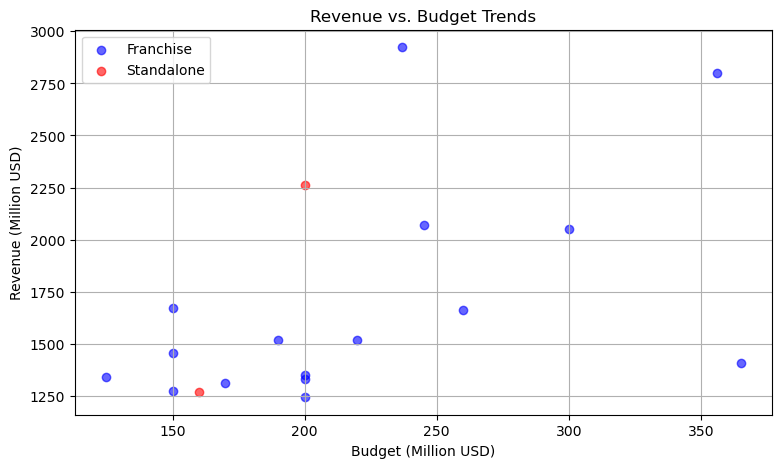

In [37]:
# revenue vs budget

plt.figure(figsize=(9, 5))
# Plot franchise movies
franchise = df_movies[df_movies['franchise'] != 'Standalone']
plt.scatter(franchise['budget_million_usd'], franchise['revenue_million_usd'], 
            color='blue', alpha=0.6, label='Franchise')

# Plot standalone movies
standalone = df_movies[df_movies['franchise'] == 'Standalone']
plt.scatter(standalone['budget_million_usd'], standalone['revenue_million_usd'], 
            color='red', alpha=0.6, label='Standalone')

plt.title('Revenue vs. Budget Trends')
plt.xlabel('Budget (Million USD)')
plt.ylabel('Revenue (Million USD)')
plt.legend()
plt.grid(True)
plt.show()

* Most of the highest revenue points belong to franchise movies
* Standalone films tend to cluster in the lower revenue zone, with only one pushing above the 2B dollars mark
* Some franchise films with very high budgets (300M–350M) didn't perform as well as others with more modest budgets


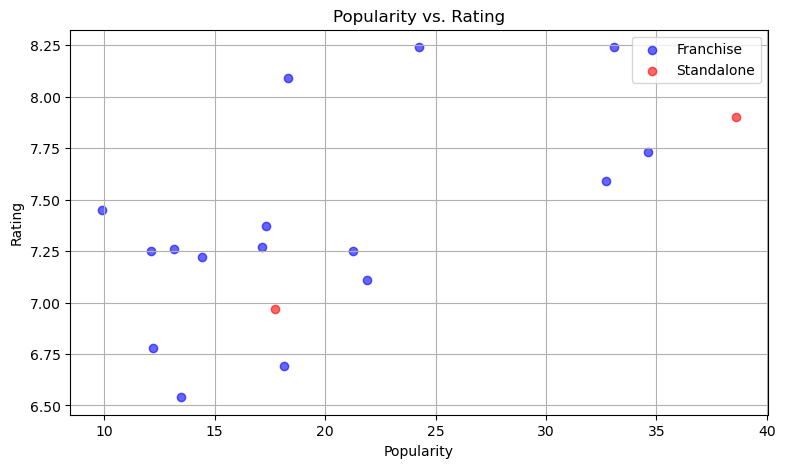

In [45]:
# scatter plot for popularity vs rating
plt.figure(figsize=(9, 5))
# Plot franchise movies
plt.scatter(franchise['popularity'], franchise['vote_average'], 
            color='blue', alpha=0.6, label='Franchise')

# Plot standalone movies
plt.scatter(standalone['popularity'], standalone['vote_average'], 
            color='red', alpha=0.6, label='Standalone')

plt.title('Popularity vs. Rating')
plt.xlabel('Popularity')
plt.ylabel('Rating')
plt.legend()
plt.grid(True)
plt.show()

In [46]:
# line graph of yearly trends

# Extract year from release_date
df_movies['year'] = pd.to_datetime(df_movies['release_date']).dt.year

# Calculate yearly metrics
yearly_metrics = df_movies.groupby('year').agg({
    'revenue_million_usd': 'mean',
    'budget_million_usd': 'mean'
}).reset_index()


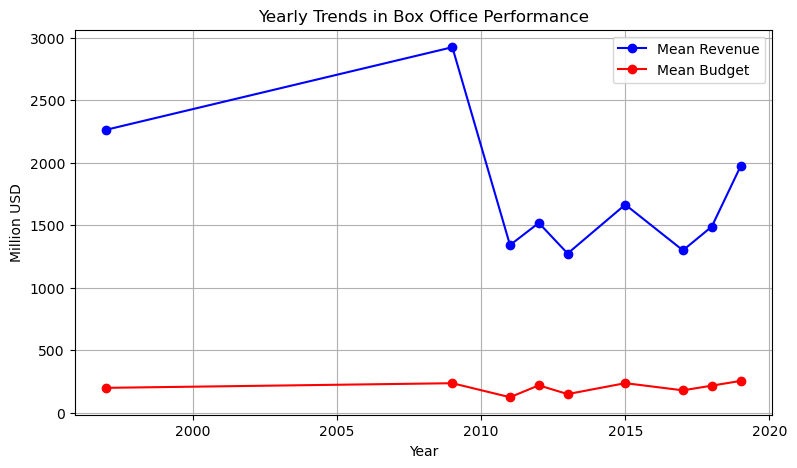

In [47]:

plt.figure(figsize=(9, 5))
plt.plot(yearly_metrics['year'], yearly_metrics['revenue_million_usd'], 
         'b-o', label='Mean Revenue')
plt.plot(yearly_metrics['year'], yearly_metrics['budget_million_usd'], 
         'r-o', label='Mean Budget')

plt.title('Yearly Trends in Box Office Performance')
plt.xlabel('Year')
plt.ylabel('Million USD')
plt.legend()
plt.grid(True)
plt.show()

In [48]:
# standalone vs franchise

# Calculate metrics
franchise_metrics = df_movies[df_movies['franchise'] != 'Standalone'].agg({
    'revenue_million_usd': 'mean',
    'budget_million_usd': 'mean'
})

standalone_metrics = df_movies[df_movies['franchise'] == 'Standalone'].agg({
    'revenue_million_usd': 'mean',
    'budget_million_usd': 'mean'
})


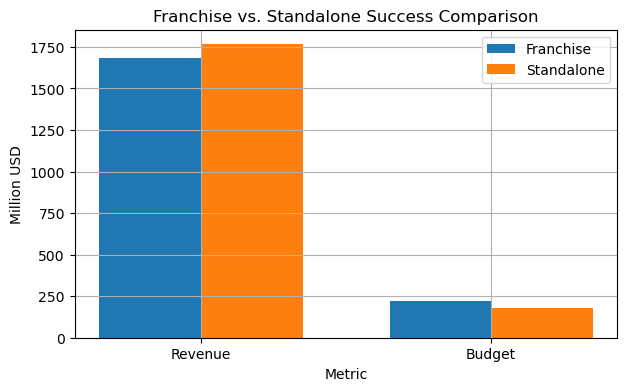

In [50]:

plt.figure(figsize=(7, 4))
x = range(2)
width = 0.35

plt.bar([i - width/2 for i in x], [franchise_metrics['revenue_million_usd'], 
                                   franchise_metrics['budget_million_usd']], 
        width, label='Franchise')
plt.bar([i + width/2 for i in x], [standalone_metrics['revenue_million_usd'], 
                                   standalone_metrics['budget_million_usd']], 
        width, label='Standalone')

plt.title('Franchise vs. Standalone Success Comparison')
plt.xlabel('Metric')
plt.ylabel('Million USD')
plt.xticks(x, ['Revenue', 'Budget'])
plt.legend()
plt.grid(True)
plt.show()